In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import pathlib

In [2]:
precipt_data_path = pathlib.Path("../dataset/PRECIPT_PER_DATE.csv")
precipt_df = pd.read_csv(precipt_data_path, header=None, 
                         names=['Data', 'Precipt'])
precipt_df.head()

,Data,Precipt
0,07/05/2000,0.0
1,08/05/2000,0.0
2,09/05/2000,1.2
3,10/05/2000,0.0
4,11/05/2000,27.2


In [3]:
len(precipt_df)

8269

In [4]:
precipt_df['ano_idx'] = precipt_df['Data'].apply(lambda d: int(d.split("/")[2]) - 2000)

In [5]:
precipt_df.head()

,Data,Precipt,ano_idx
0,07/05/2000,0.0,0
1,08/05/2000,0.0,0
2,09/05/2000,1.2,0
3,10/05/2000,0.0,0
4,11/05/2000,27.2,0


In [28]:
mean_7_days = list()
curr_mean = 0
for idx in range(len(precipt_df)):
    if idx > 6:
        sum_last_7_days = sum(precipt_df.loc[idx+1-7:idx+1]['Precipt'].values)
        new_mean = sum_last_7_days/7
    else:
        new_mean = precipt_df.loc[idx]['Precipt']
    mean_7_days.append(new_mean)
    new_mean = curr_mean

precipt_df["7_day_mean"] = mean_7_days

In [29]:
precipt_df.tail()

,Data,Precipt,ano_idx,2_day_mean,7_day_mean
8264,27/12/2022,2842.8,22,1421.4,3949.371429
8265,28/12/2022,4491.4,22,2245.7,3830.657143
8266,29/12/2022,2897.2,22,1448.6,3722.057143
8267,30/12/2022,2704.4,22,1352.2,3577.085714
8268,31/12/2022,1975.2,22,987.6,3161.828571


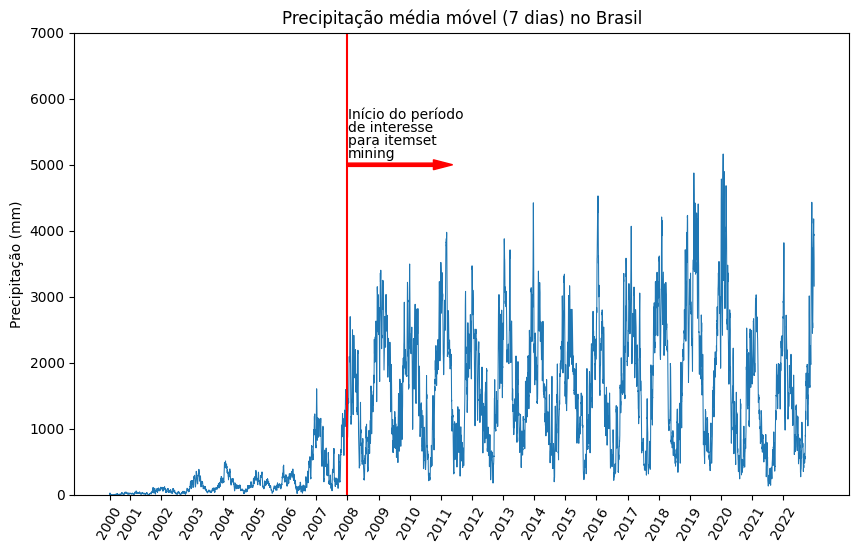

In [66]:
fig, axs = plt.subplots(figsize=(10, 6))
x_range = list(range(len(precipt_df)))
# sns.lineplot(data=precipt_df, x=x_range, y="Precipt", size=1, 
#              ax=axs, legend=False, label='Precipitação')
sns.lineplot(data=precipt_df, x=x_range, y="7_day_mean", size=1, 
             ax=axs, legend=False)

meds_per_year = precipt_df.groupby(by='ano_idx').count()['Data'].values
curr_year = 2000
curr_xtick = 0
xticks = list()
years = list()
for meds in meds_per_year:
    xticks.append(curr_xtick)
    years.append(curr_year)
    curr_xtick += meds
    curr_year += 1

plt.vlines(xticks[8], 0, 7000, colors="r")
plt.text(xticks[8]+10, 5700, "Início do período")
plt.text(xticks[8]+10, 5500, "de interesse")
plt.text(xticks[8]+10, 5300, "para itemset")
plt.text(xticks[8]+10, 5100, "mining")
plt.arrow(xticks[8]+10, 5000, 1000, 0, width=50, color='r')
plt.xticks(xticks, years, rotation=60)
plt.ylabel("Precipitação (mm)")
plt.title("Precipitação média móvel (7 dias) no Brasil")
plt.ylim((0, 7000))
plt.savefig("assets/precipt_movel.png")
plt.show()